<a href='https://www.darshan.ac.in/'> <img src='https://www.darshan.ac.in/Content/media/DU_Logo.svg' width="250" height="300"/></a>
<pre>
<center><b><h1>Machine Learning - 2301CS621</b></center>

<center><b><h1>Lab - 8</b></center>
Name: Nisarg Kaneriya
Enrollnment No: 22010101086
<pre>    


# Step 1: Import Libraries
This step imports all necessary libraries for data processing, visualization, and machine learning.

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import plot_tree


# Step 2: Load the Dataset
Load Given dataset -  heart.csv

In [2]:
dataset=pd.read_csv("heart.csv")

In [3]:
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


# Step 3: Data Overview
In this step, we examine the dataset structure, summary statistics, and check for missing values.

In [5]:
print(dataset.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


In [6]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None


In [7]:
print(dataset.describe())

               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.000000     0.000000    71.000000  

In [8]:
print(dataset.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


# Step 4: Univariate Analysis
Here we visualize the distribution of each feature using histograms.

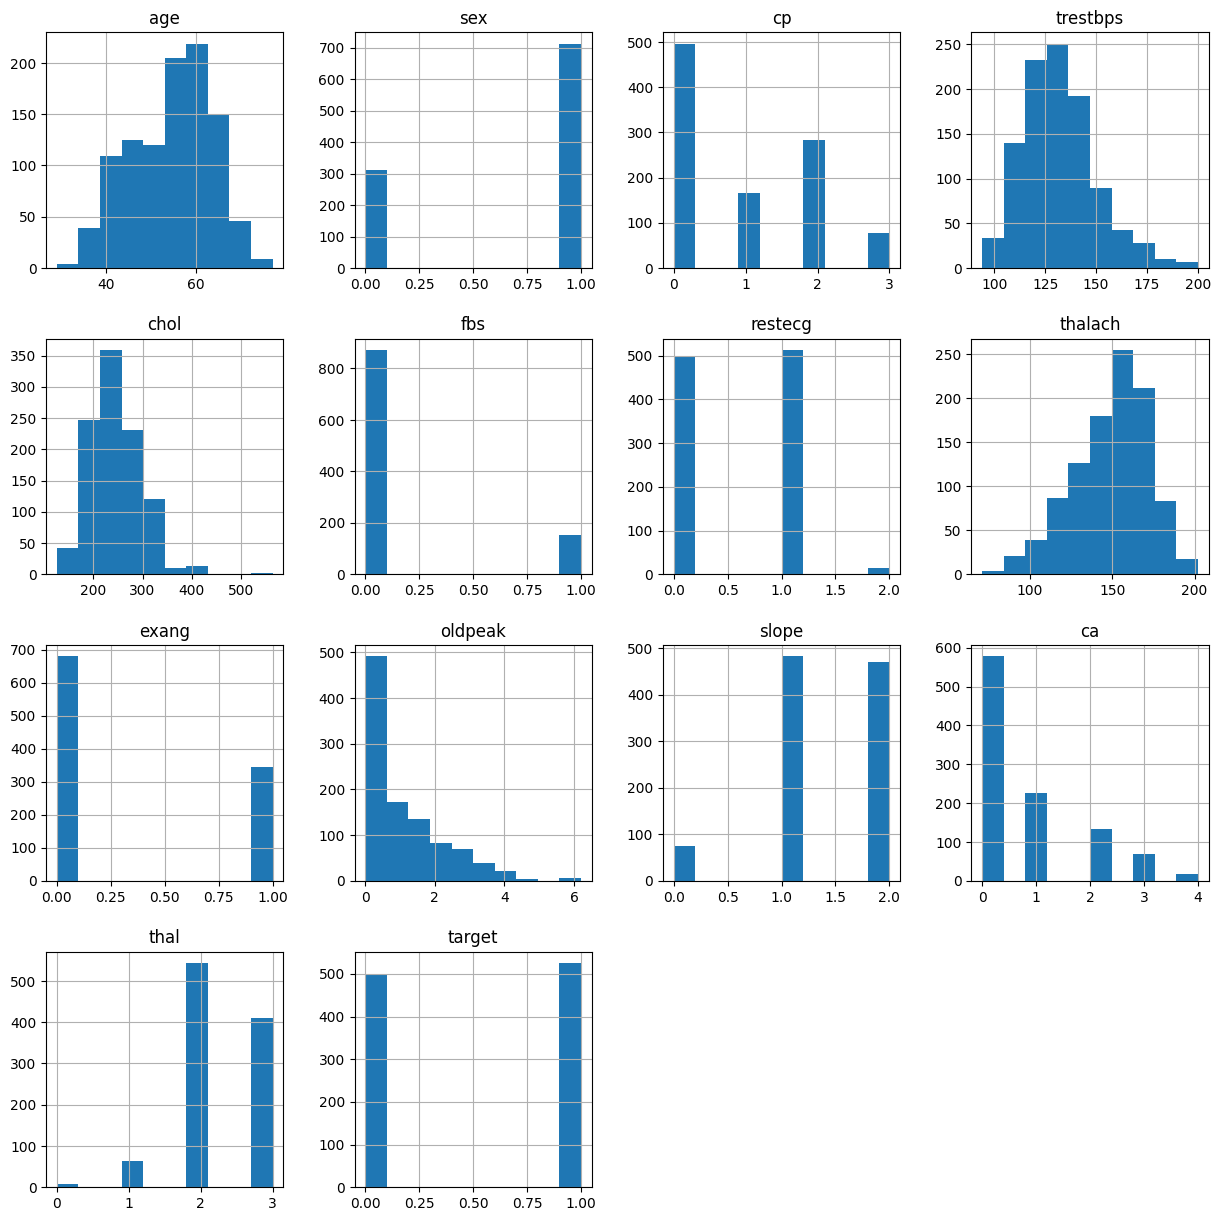

In [14]:
dataset.hist(figsize=(15, 15))
plt.show()

# Step 5: Bivariate Analysis
This step involves exploring the correlations between features using a heatmap.

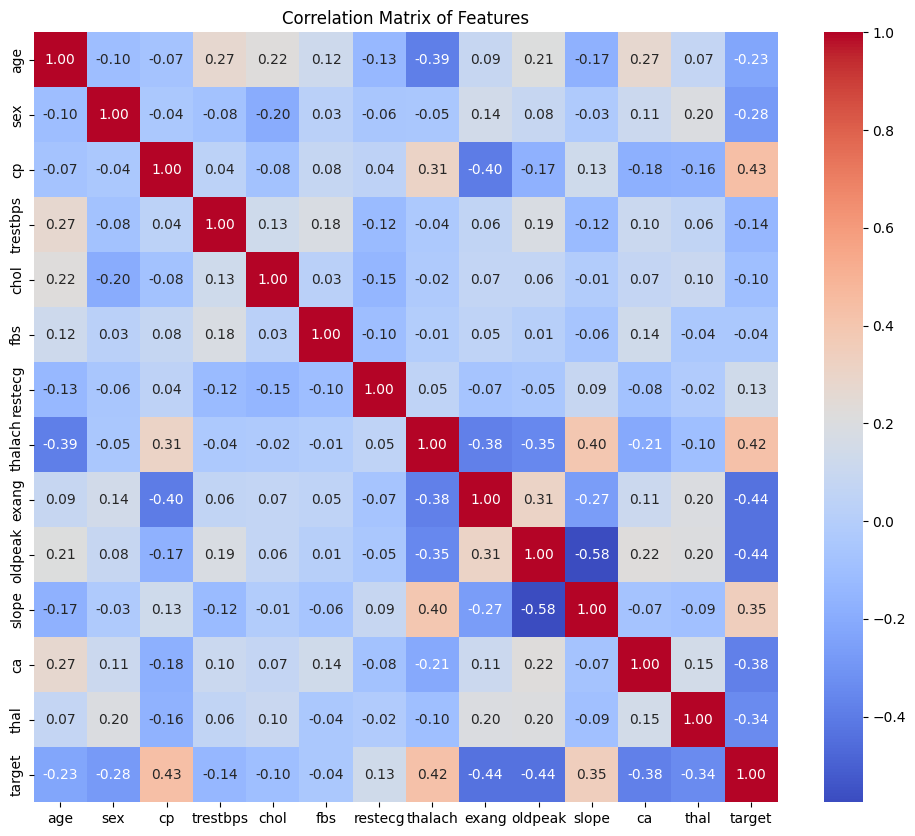

In [15]:
import seaborn as sns

plt.figure(figsize=(12, 10))
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

# Step 6: Outlier Detection
We visualize potential outliers using boxplots.

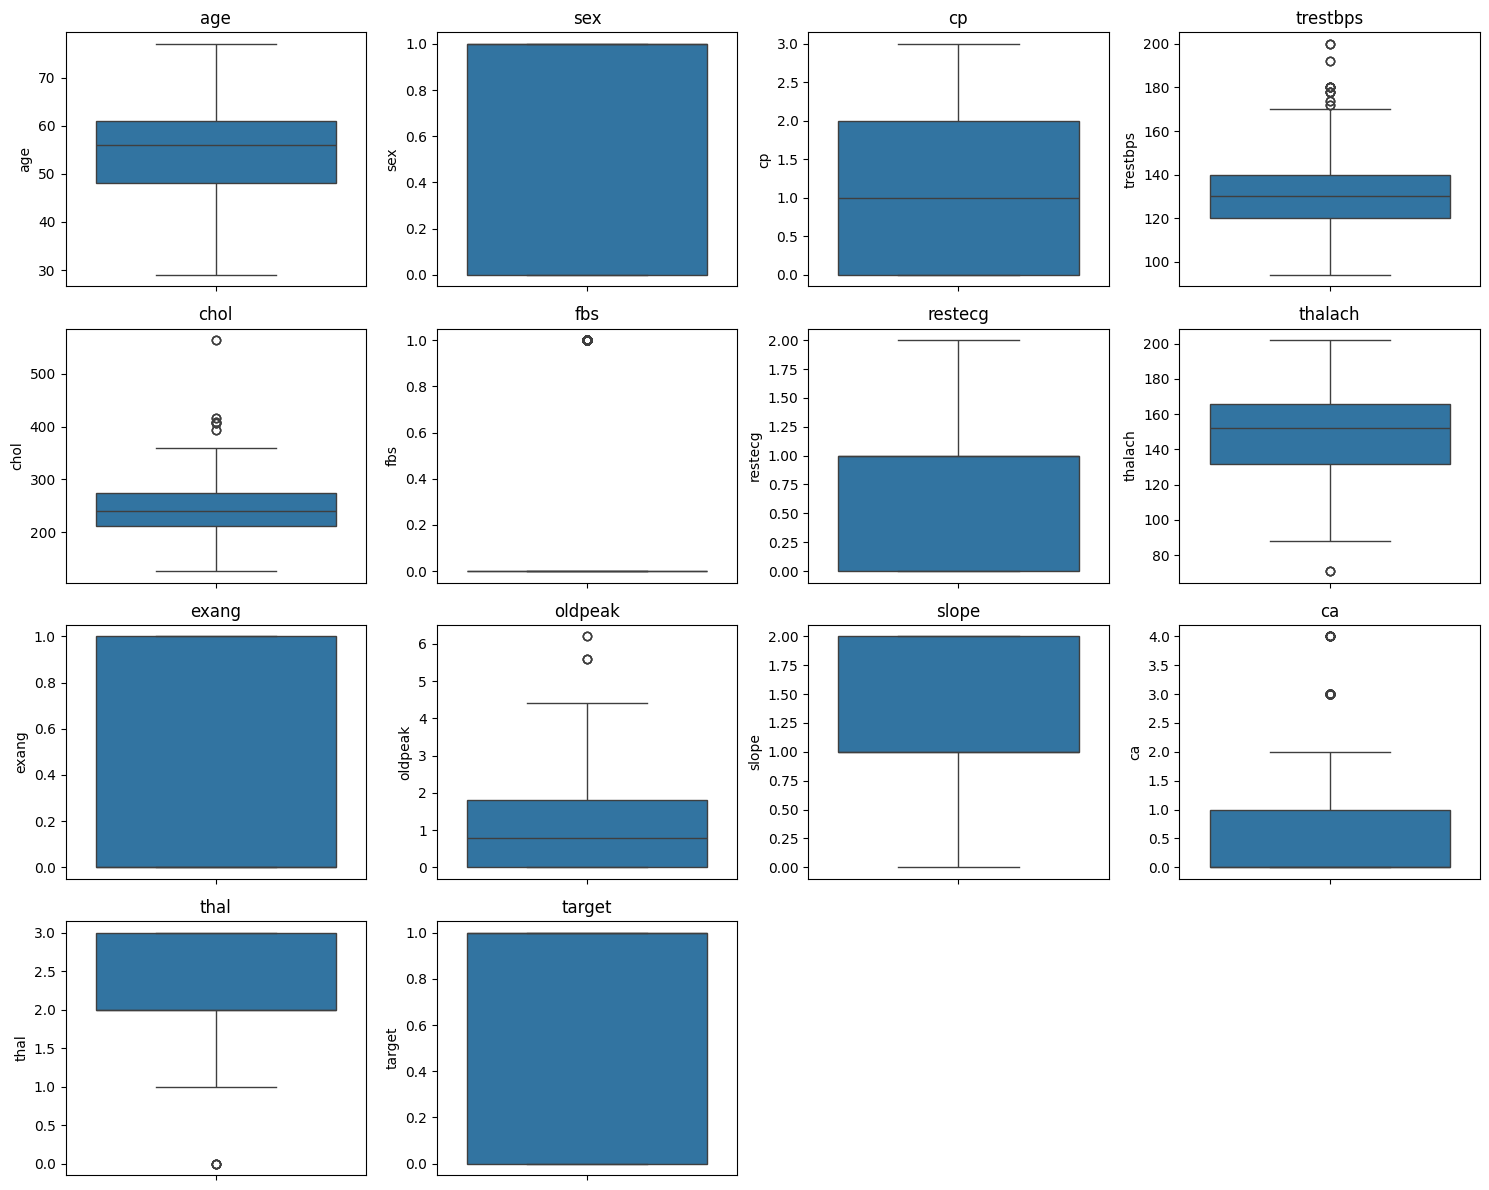

In [16]:
plt.figure(figsize=(15, 12))
for i, col in enumerate(dataset.columns):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(y=dataset[col])
    plt.title(col)
plt.tight_layout()
plt.show()

# Step 7: Split Data into Training and Testing Sets
The dataset is split into training and testing sets for model evaluation.

In [17]:

X = dataset.drop('target', axis=1)
y = dataset['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Example test_size and random_state

# Step 8: Train Decision Tree
We train a Decision Tree Classifier on the training data. You have to also check for KNeighborsClassifier and  GaussianNB

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
dt_predictions = dt_classifier.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
print("Decision Tree Accuracy:", dt_accuracy)
print(classification_report(y_test, dt_predictions))

Decision Tree Accuracy: 0.9853658536585366
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



In [20]:
# KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=5) # Example n_neighbors
knn_classifier.fit(X_train, y_train)
knn_predictions = knn_classifier.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predictions)
print("KNN Accuracy:", knn_accuracy)
print(classification_report(y_test, knn_predictions))


KNN Accuracy: 0.7317073170731707
              precision    recall  f1-score   support

           0       0.73      0.73      0.73       102
           1       0.73      0.74      0.73       103

    accuracy                           0.73       205
   macro avg       0.73      0.73      0.73       205
weighted avg       0.73      0.73      0.73       205



In [21]:

# GaussianNB
gnb_classifier = GaussianNB()
gnb_classifier.fit(X_train, y_train)
gnb_predictions = gnb_classifier.predict(X_test)
gnb_accuracy = accuracy_score(y_test, gnb_predictions)
print("Gaussian Naive Bayes Accuracy:", gnb_accuracy)
print(classification_report(y_test, gnb_predictions))

Gaussian Naive Bayes Accuracy: 0.8
              precision    recall  f1-score   support

           0       0.87      0.71      0.78       102
           1       0.75      0.89      0.82       103

    accuracy                           0.80       205
   macro avg       0.81      0.80      0.80       205
weighted avg       0.81      0.80      0.80       205



# Step 9: Evaluate Decision Tree
We evaluate the Decision Tree model using accuracy, confusion matrix, and classification report.

Decision Tree Confusion Matrix:
 [[102   0]
 [  3 100]]


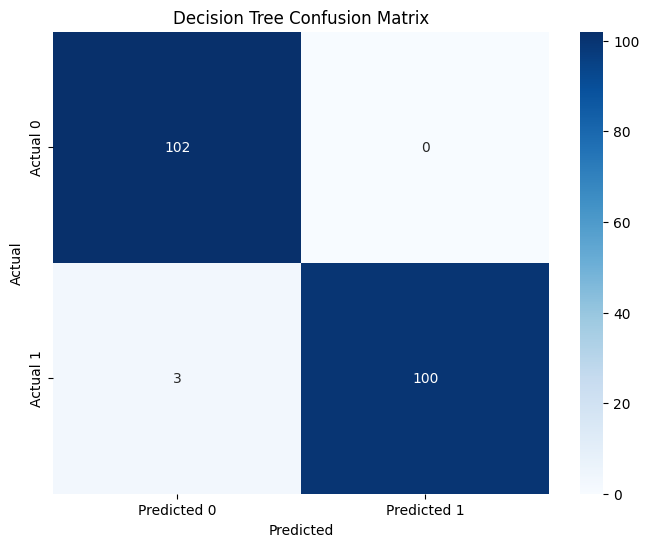

In [22]:

dt_cm = confusion_matrix(y_test, dt_predictions)
print("Decision Tree Confusion Matrix:\n", dt_cm)

plt.figure(figsize=(8, 6))
sns.heatmap(dt_cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Step 10: Visualize Decision Tree
Here we visualize the structure of the trained Decision Tree.

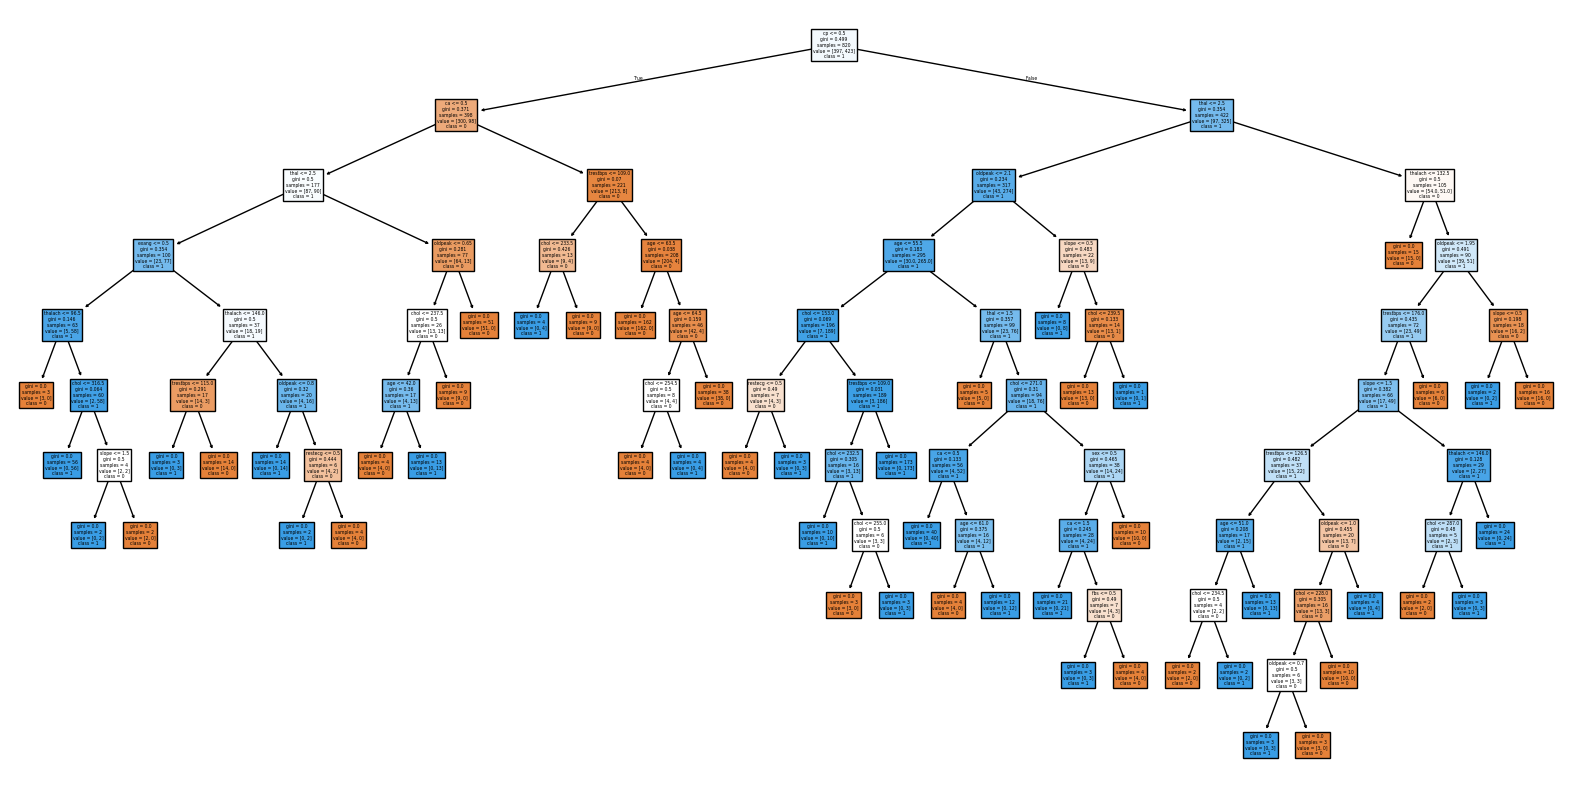

In [23]:
plt.figure(figsize=(20, 10))
plot_tree(dt_classifier, feature_names=X.columns, class_names=['0', '1'], filled=True)
plt.show()

# Step 11: Train Bagging Classifier
We train a Bagging Classifier with Decision Trees as the base model.

In [28]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize Bagging Classifier with corrected parameter name
bagging_classifier = BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42),
                                       n_estimators=10,
                                       random_state=42)

# Train the classifier
bagging_classifier.fit(X_train, y_train)

# Predictions
bagging_predictions = bagging_classifier.predict(X_test)


# Step 12: Evaluate Bagging Classifier
The Bagging model is evaluated using accuracy.

In [27]:
# Accuracy and Classification Report
bagging_accuracy = accuracy_score(y_test, bagging_predictions)
print("Bagging Classifier Accuracy:", bagging_accuracy)
print(classification_report(y_test, bagging_predictions))


Bagging Classifier Accuracy: 0.9853658536585366
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



# Step 13: Train Random Forest
We train a Random Forest Classifier on the dataset.

In [29]:
# prompt: We train a Random Forest Classifier on the dataset

from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42) # Example n_estimators

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Predictions
rf_predictions = rf_classifier.predict(X_test)

# Evaluate Random Forest Classifier
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Classifier Accuracy:", rf_accuracy)
print(classification_report(y_test, rf_predictions))

Random Forest Classifier Accuracy: 0.9853658536585366
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



# Step 14: Feature Importance in Random Forest
We analyze feature importance as determined by the Random Forest model.

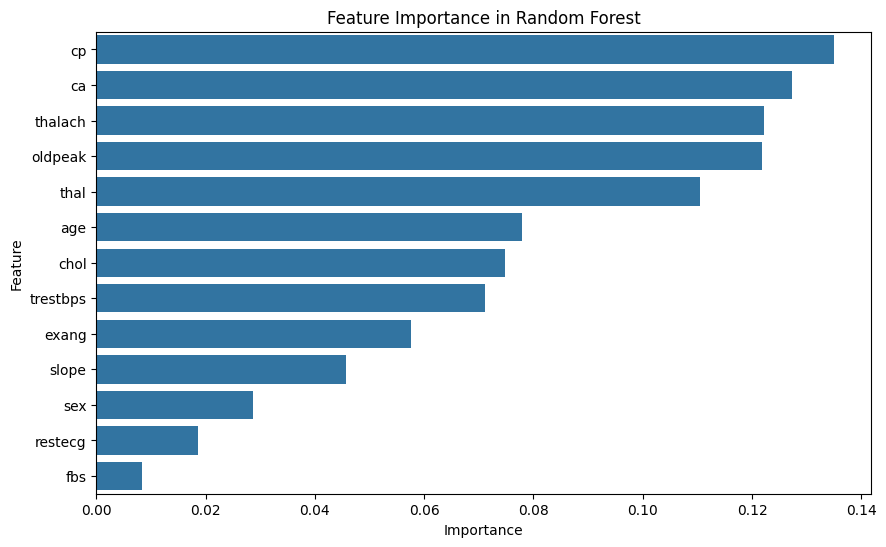

In [31]:

importances = rf_classifier.feature_importances_

feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importance in Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Step 15: Evaluate Random Forest
We evaluate the Random Forest model using accuracy.

In [32]:

from sklearn.metrics import accuracy_score
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Classifier Accuracy:", rf_accuracy)

Random Forest Classifier Accuracy: 0.9853658536585366


# Step 16: Train AdaBoost Classifier
We train an AdaBoost Classifier on the dataset.

In [33]:
# prompt: We train an AdaBoost Classifier on the dataset.

from sklearn.ensemble import AdaBoostClassifier

ada_classifier = AdaBoostClassifier(n_estimators=50, random_state=42)

ada_classifier.fit(X_train, y_train)

ada_predictions = ada_classifier.predict(X_test)

ada_accuracy = accuracy_score(y_test, ada_predictions)
print("AdaBoost Classifier Accuracy:", ada_accuracy)
print(classification_report(y_test, ada_predictions))

AdaBoost Classifier Accuracy: 0.8146341463414634
              precision    recall  f1-score   support

           0       0.84      0.77      0.81       102
           1       0.79      0.85      0.82       103

    accuracy                           0.81       205
   macro avg       0.82      0.81      0.81       205
weighted avg       0.82      0.81      0.81       205



# Step 17: Evaluate AdaBoost Classifier
The AdaBoost model is evaluated using accuracy.

In [35]:
ada_accuracy = accuracy_score(y_test, ada_predictions)
print("AdaBoost Classifier Accuracy:", ada_accuracy)

AdaBoost Classifier Accuracy: 0.8146341463414634


🔥 Improved AdaBoost Classifier Accuracy: 0.9853658536585366
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205

Confusion Matrix:
 [[102   0]
 [  3 100]]


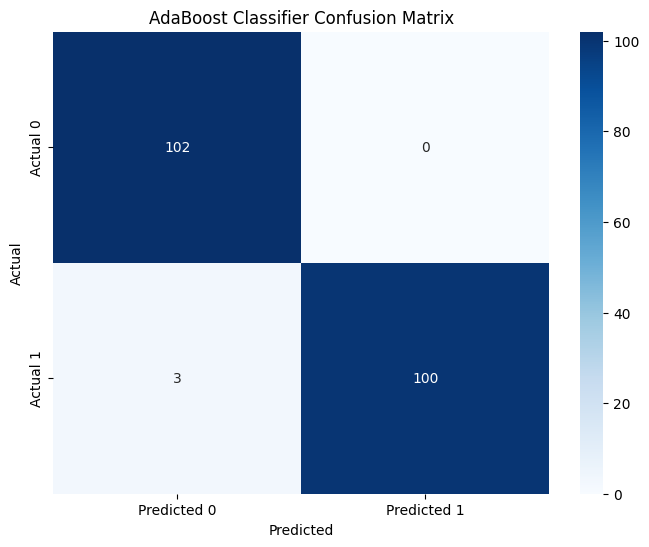

In [38]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE  # Handle imbalance
import matplotlib.pyplot as plt
import seaborn as sns

# 🔹 Scale features to improve model performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 🔹 Handle class imbalance using SMOTE (if dataset is imbalanced)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# 🔹 Use a deeper Decision Tree as the base estimator
base_clf = DecisionTreeClassifier(max_depth=3, min_samples_split=5, min_samples_leaf=2)

# 🔹 Train AdaBoost with more estimators and optimized learning rate
ada_classifier = AdaBoostClassifier(estimator=base_clf,
                                    n_estimators=200,  # More weak learners
                                    learning_rate=0.8, # Fine-tuned
                                    random_state=42)

# Train the model
ada_classifier.fit(X_train_resampled, y_train_resampled)

# Predictions
ada_predictions = ada_classifier.predict(X_test_scaled)

# Accuracy and report
ada_accuracy = accuracy_score(y_test, ada_predictions)
print("🔥 Improved AdaBoost Classifier Accuracy:", ada_accuracy)
print(classification_report(y_test, ada_predictions))

# Confusion Matrix
ada_cm = confusion_matrix(y_test, ada_predictions)
print("Confusion Matrix:\n", ada_cm)

# 🔹 Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(ada_cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title("AdaBoost Classifier Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [39]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(n_estimators=200, learning_rate=0.05, max_depth=4)
xgb_clf.fit(X_train_scaled, y_train)

xgb_predictions = xgb_clf.predict(X_test_scaled)
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
print("🚀 XGBoost Accuracy:", xgb_accuracy)


🚀 XGBoost Accuracy: 0.975609756097561
